<a href="https://colab.research.google.com/github/BachokunIAR/stroke_prediction/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [102]:
from google.colab import files

upload = files.upload()

In [103]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [104]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [106]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [107]:
df = df.dropna()

df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [108]:
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ['id']
col_numerical = [ e for e in num_col if e not in remove_list]

In [109]:
categorical_col = []
for k, v in df.items():
    if v.dtype =='object':
        categorical_col.append(k)

print(categorical_col)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [110]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [111]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [112]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [113]:
# here the gender can be tranform to 0 and 1 for the machine to understang.
# Whethere a male is 0 or 1 is not import since the arrangementis not hierachical


df['gender']=df['gender'].map({"Female":0,
                               "Male":1,
                               "Other":np.nan})
# since the number of enyries for other in the gender is 1,
#it can be removed  by first convert to NaN and dropna without any effect in our final analysis
df1 = df.dropna()

In [114]:
df1['gender'].unique()

array([1., 0.])

In [115]:
df1['gender'].value_counts()

0.0    2897
1.0    2011
Name: gender, dtype: int64

In [116]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,1.0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,0.0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,0.0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,1.0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [117]:
df1['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [118]:
df1['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [119]:
df1['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [120]:
df1['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [121]:
df1['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [122]:
df1['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [123]:
df1[col_numerical].corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


### As shown above, it is not very easy to sea the relationship between the features and haert failure. So the heatmap makes it easier to sea the corelation between the indivual feature and heart failure.

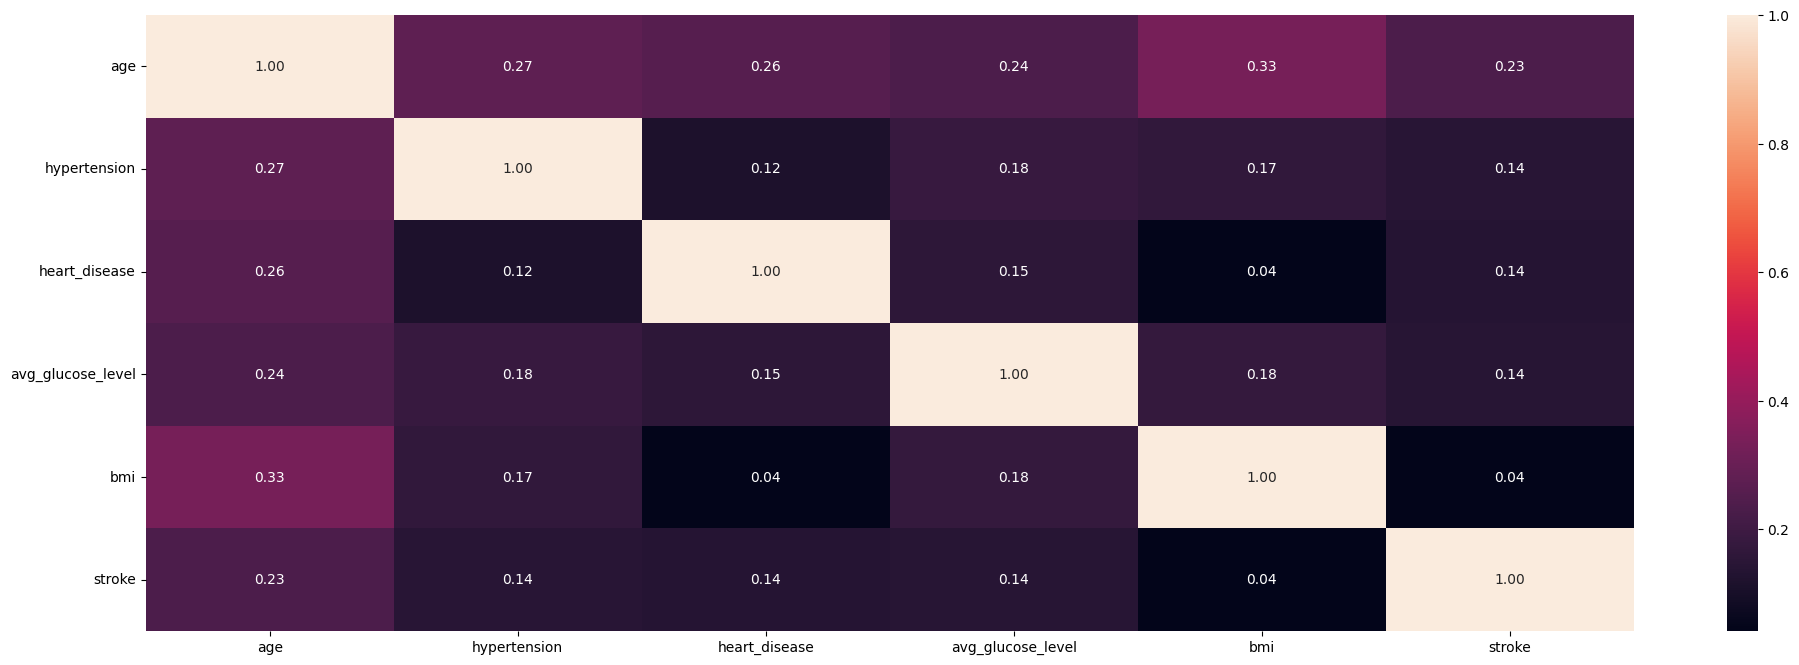

In [124]:
plt.figure(figsize=(24,8))
sns.heatmap(df1[col_numerical].corr(),annot =True, fmt= ".2f");

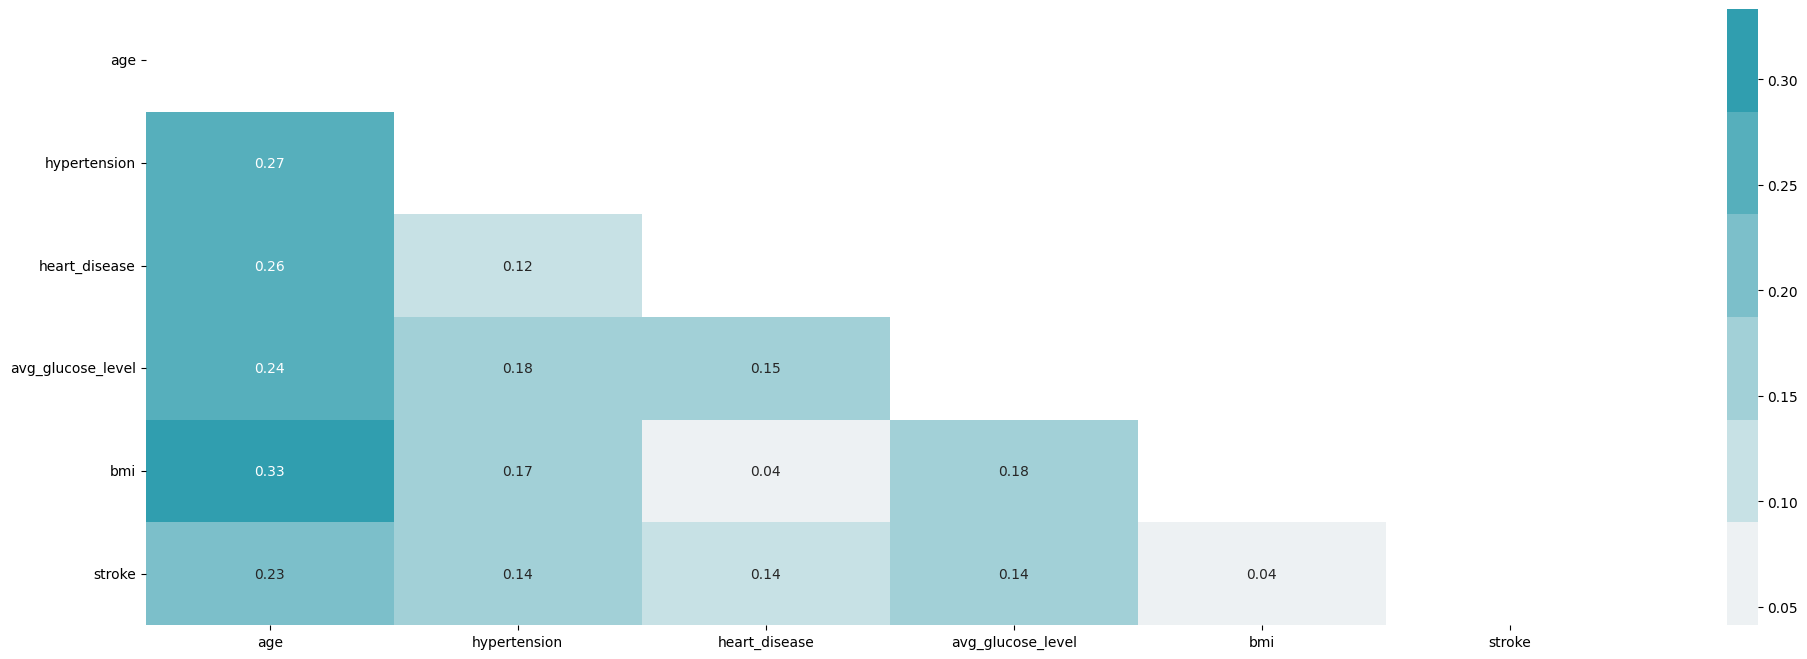

In [125]:
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(df1[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.light_palette((210,90,60), input = 'husl')

# heatmap with mask and correct aspect ratio
sns.heatmap(df1[col_numerical].corr(),mask = mask, cmap = cmap, annot = True, fmt = ".2f");

In [126]:
#plt.rcParams['figure.figsize']=[15,15]

#df1.hist();

In [127]:
import plotly.express as px

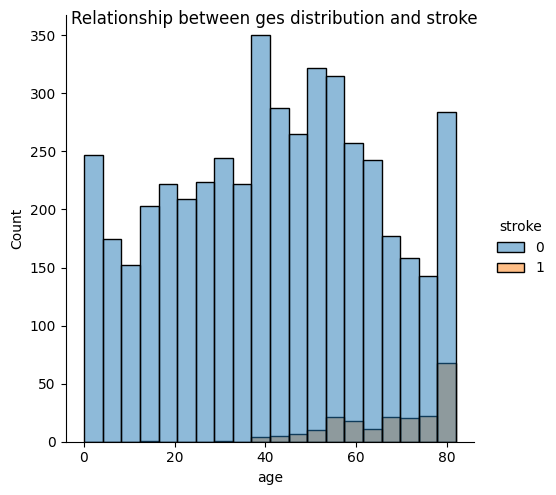

In [128]:
af = sns.displot(data = df1,
    x = 'age',
    hue = 'stroke'

)
af.fig.suptitle('Relationship between ges distribution and stroke');

In [129]:
fig = px.box(df1,
             x="stroke",
             y="age",
             color="stroke",
             title="Stroke based on age(0 : No stroke  and  1 : stroke)",
             color_discrete_map={'1':'red',
                                 '0':'green'}
             )

fig.update_traces(quartilemethod="exclusive")
fig.show()

this is more clear as we see that stroke is more likely to suufer stroke from age range aboove 60 year

In [143]:
data_cat = pd.get_dummies(df1[col_categorical])
pd.set_option('display.max_columns',None)
data_cat.head()

,gender,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
0,1.0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,1.0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,0.0,0,0,0,1,0,0,1,0,0,0,1,0,1
4,0.0,0,0,1,0,0,0,0,1,0,1,0,0,1
5,1.0,0,1,0,0,0,0,1,0,0,0,1,0,1


In [144]:
df2 = pd.concat([df1[col_numerical],data_cat],axis =1)#.drop(['stroke'],axis=1)
pd.set_option('display.max_columns',None)
df2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.6,1,1.0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,1,1.0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,0.0,0,0,0,1,0,0,1,0,0,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0.0,0,0,1,0,0,0,0,1,0,1,0,0,1
5,81.0,0,0,186.21,29.0,1,1.0,0,1,0,0,0,0,1,0,0,0,1,0,1


# <font color =green> Train, validation, test datasets </font>

In [146]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

train , valid, test = np.split(df2.sample(frac=1), [int(0.6*len(df2)),int(0.8*len(df2))])


In [153]:
def scale_dataset(dataframe):
    x = dataframe[dataframe.cols[:-5]].values
    y = dataframe[dataframe.cols[-5]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    data = np.hstack((x,np.reshape(y,(-1,1))))
    return data, x,y

In [154]:
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
137,76.00,0,0,207.28,34.9,1,0.0,1,0,0,0,0,0,1,0,0,0,1,0,1
1759,45.00,0,0,176.48,24.0,0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,1
4789,39.00,0,0,89.32,31.0,0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,1
3807,1.64,0,0,56.21,19.0,0,1.0,1,0,0,0,0,0,0,0,1,1,0,1,0
4197,53.00,0,1,95.23,35.2,0,1.0,0,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,38.00,0,0,162.72,31.9,0,1.0,0,0,0,1,0,0,1,0,0,1,0,1,0
733,6.00,0,0,70.78,20.3,0,1.0,1,0,0,0,0,0,0,0,1,0,1,1,0
1812,35.00,0,0,97.58,24.3,0,0.0,1,0,0,0,0,0,1,0,0,0,1,1,0
2732,58.00,1,0,59.52,33.2,0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1


In [156]:
print(len(train[train['stroke']==1]))

124


In [157]:
print(len(train[train['stroke']==0]))

2820


The number of '0' is too much in excess in comparison to '1' fro the train data. This will not be a general representation when we  start to apply our model in real world. The data need to be oversampled to make them have the same counts for the target (y)

# <font color = green> Overesampling </font>

In [158]:
from imblearn.over_sampling import RandomOverSampler

In [159]:
def scale_dataset(dataframe,oversample=False):
    x = dataframe[dataframe.columns[:-5]].values
    y = dataframe[dataframe.columns[-5]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x , y = ros.fit_resample(x,y)
    data = np.hstack((x,np.reshape(y,(-1,1))))
    return data, x,y

In [160]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid ,y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [161]:
len(y_train==1)

5074

In [162]:
len(y_train==0)

5074

## KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [164]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [165]:
y_pred = knn_model.predict(x_test)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      0.99      1.00       135

    accuracy                           1.00       982
   macro avg       1.00      1.00      1.00       982
weighted avg       1.00      1.00      1.00       982



In [185]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, knn_model.predict(x_train))

array([[2537,    0],
       [   0, 2537]])

In [186]:
confusion_matrix(y_test, knn_model.predict(x_test))

array([[847,   0],
       [  1, 134]])

In [169]:
input_data = (1.64,0,0,56.21,19.0,1.0,1,0,0,0,1,1,0,1,0)
input_data_np = np.asarray(input_data)
input_data_re = input_data_np.reshape(1,-1)
pred = knn_model.predict(input_data_re)
print(pred)
if(pred[0]==0):
    print("The patient has no stroke")

else:
    print("The patient has stroke")

[0]
The patient has no stroke


# <font color = red> Support Vector Machine</font>

In [171]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)


In [172]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00       135

    accuracy                           1.00       982
   macro avg       1.00      1.00      1.00       982
weighted avg       1.00      1.00      1.00       982



In [187]:
confusion_matrix(y_train, svm_model.predict(x_train))

array([[2537,    0],
       [   0, 2537]])

In [189]:
confusion_matrix(y_test, svm_model.predict(x_test))

array([[847,   0],
       [  0, 135]])

In [173]:
input_data = (1.64,0,0,56.21,19.0,1.0,1,0,0,0,1,1,0,1,0)
input_data_np = np.asarray(input_data)
input_data_re = input_data_np.reshape(1,-1)
pred = svm_model.predict(input_data_re)
print(pred)
if(pred[0]==0):
    print("The patient has no stroke")

else:
    print("The patient has stroke")

[0]
The patient has no stroke
